In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [331]:
df=pd.read_csv("./order_info_2016.csv",index_col="id")

In [332]:
df.head()

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,
1,232148841,2794924,268,110001,35300,35300,9058255c90,3,2016-01-01 12:53:02,2016-01-01 12:53:24
2,222298971,1664684,801,330001,51200,49900,e0e6019897,2,2016-01-01 21:42:51,2016-01-01 21:43:30
3,211494392,2669372,934,220002,62100,62100,9058255c90,3,2016-01-01 14:10:13,2016-01-01 14:11:18
4,334575272,1924727,422,230001,50600,42000,46d5cea30d,2,2016-01-01 17:43:35,2016-01-01 17:43:53
5,144825651,4148671,473,130006,149100,142000,6ff1752b69,2,2016-01-01 18:52:04,2016-01-01 18:52:47


In [333]:
df.describe()

,orderId,userId,productId,cityId,price,payMoney,deviceType
count,1.045570e+05,1.045570e+05,104557.000000,104557.000000,1.045570e+05,1.045570e+05,104557.000000
mean,2.993341e+08,3.270527e+06,504.566275,154410.947225,9.167350e+04,8.686689e+04,2.385292
std,5.149818e+07,4.138208e+07,288.130647,72197.163762,9.158836e+04,9.072028e+04,0.648472
min,1.035627e+08,2.930600e+04,0.000000,30000.000000,6.000000e+02,-1.000000e+03,1.000000
25%,2.633627e+08,2.179538e+06,254.000000,100011.000000,3.790000e+04,3.360000e+04,2.000000
50%,2.989828e+08,2.705995e+06,507.000000,150001.000000,5.920000e+04,5.500000e+04,2.000000
75%,3.349972e+08,3.271237e+06,758.000000,220002.000000,1.080000e+05,1.040000e+05,3.000000
max,4.871430e+08,3.072939e+09,1000.000000,380001.000000,2.295600e+06,2.294200e+06,6.000000


In [334]:
#加载devicetype
device_type=pd.read_csv("./device_type.txt")
device_type

,id,deviceType
0,1,PC
1,2,Android
2,3,iPhone
3,4,Wap
4,5,other


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104557 entries, 1 to 104557
Data columns (total 10 columns):
orderId       104557 non-null int64
userId        104557 non-null int64
productId     104557 non-null int64
cityId        104557 non-null int64
price         104557 non-null int64
payMoney      104557 non-null int64
channelId     104549 non-null object
deviceType    104557 non-null int64
createTime    104557 non-null object
payTime       104557 non-null object
dtypes: int64(7), object(3)
memory usage: 8.8+ MB


# 清洗数据

In [336]:
#确认order_id是唯一的
print(df.orderId.unique().size)
print(df.orderId.size)
#有重复值放到最后处理

104530
104557


In [337]:
#userid 重复合理 因为一个用户可以有多笔订单的
print(df.userId.unique().size)

102672


In [338]:
#cityid 重复合理 
print(df.cityId.unique().size)

331


In [339]:
#查看productId为0的数据  177条可能因为商品下架  需删除
df[df["productId"]==0]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,
33,238261943,1754048,0,180012,16700,12800,e22babe5d4,2,2016-01-01 22:54:04,2016-01-01 22:54:20
84,247850701,2642230,0,40001,46400,46400,9058255c90,3,2016-01-01 19:58:56,2016-01-01 19:59:31
645,291598894,1492642,0,180001,18900,18900,6ff1752b69,2,2016-02-01 03:02:08,2016-02-01 03:02:34
966,291630520,2823881,0,180001,15300,10000,4c33002d9a,2,2016-02-02 17:49:26,2016-02-02 17:50:05
1087,299867031,1968045,0,230001,74500,74500,20e2eebb7a,4,2016-01-02 11:57:30,2016-01-02 11:58:10
1546,265026179,2469448,0,240001,34600,34600,ad7e4ca9ae,2,2016-02-03 12:56:38,2016-02-03 13:02:53
2329,277061322,3193431,0,180001,22000,17000,9058255c90,3,2016-02-04 20:15:42,2016-02-04 20:16:02
2330,267968985,2204456,0,180001,20000,13000,df9f79c426,2,2016-02-04 14:26:07,2016-02-04 14:26:22
3447,279269383,1048158,0,70001,146900,146900,cda4fe6bbf,1,2016-03-01 20:09:55,2016-03-01 20:12:32


In [340]:
#查看价格price 没有空值 转化单位为元
df.price=df.price/100

In [341]:
#查看payMoney 有负值 删除
df.drop(df[df["payMoney"]<0].index,inplace=True)
df.payMoney=df.payMoney/100

df[df["payMoney"]<0]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,


In [342]:
# channelID 有空值 可能因为bug导致 直接删除
df.drop(df[df["channelId"].isnull()].index,inplace=True)
df[df["channelId"].isnull()]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,


In [343]:
#deviceType根据device_type查看  无空值 是干净数据

In [344]:
#createTime payTime 不空 但是只需要2016 年的数据 进行筛选

#先转化格式
df["createTime"]=pd.to_datetime(df["createTime"])
df["payTime"]=pd.to_datetime(df["payTime"])

#筛选
df=df[df["createTime"].dt.year==2016]
#payTime 在 2016年之后没关系  考虑 年末0点前下单 支付在下一年的情况

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104538 entries, 1 to 104557
Data columns (total 10 columns):
orderId       104538 non-null int64
userId        104538 non-null int64
productId     104538 non-null int64
cityId        104538 non-null int64
price         104538 non-null float64
payMoney      104538 non-null float64
channelId     104538 non-null object
deviceType    104538 non-null int64
createTime    104538 non-null datetime64[ns]
payTime       104538 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(5), object(1)
memory usage: 8.8+ MB


In [346]:
df.describe()

,orderId,userId,productId,cityId,price,payMoney,deviceType
count,1.045380e+05,1.045380e+05,104538.000000,104538.000000,104538.000000,104538.000000,104538.000000
mean,2.993359e+08,3.270562e+06,504.573409,154407.921167,916.804435,868.762441,2.385334
std,5.149889e+07,4.138584e+07,288.135307,72195.016961,915.918454,907.236606,0.648461
min,1.035627e+08,2.930600e+04,0.000000,30000.000000,6.000000,0.000000,1.000000
25%,2.633629e+08,2.179516e+06,254.000000,100011.000000,379.000000,336.000000,2.000000
50%,2.989882e+08,2.705930e+06,507.000000,150001.000000,592.000000,550.000000,2.000000
75%,3.349981e+08,3.271170e+06,758.000000,220002.000000,1080.000000,1040.000000,3.000000
max,4.871430e+08,3.072939e+09,1000.000000,380001.000000,22956.000000,22942.000000,6.000000


In [347]:
#现在开始删除重复的orderID
df.drop(df[df.duplicated()].index,inplace=True)
#删除productID为0的数据
df.drop(df[df["productId"]==0].index,inplace=True)

In [348]:
df.describe()

,orderId,userId,productId,cityId,price,payMoney,deviceType
count,1.043610e+05,1.043610e+05,104361.000000,104361.000000,104361.000000,104361.000000,104361.000000
mean,2.993352e+08,3.271732e+06,505.429183,154432.258219,917.136861,869.063891,2.385336
std,5.150153e+07,4.142090e+07,287.628627,72127.116303,916.217971,907.552514,0.648465
min,1.035627e+08,2.930600e+04,1.000000,30000.000000,6.000000,0.000000,1.000000
25%,2.633519e+08,2.179795e+06,255.000000,100011.000000,379.000000,336.000000,2.000000
50%,2.989952e+08,2.706198e+06,508.000000,150001.000000,593.000000,550.000000,2.000000
75%,3.350016e+08,3.271395e+06,759.000000,220002.000000,1080.000000,1040.000000,3.000000
max,4.871430e+08,3.072939e+09,1000.000000,380001.000000,22956.000000,22942.000000,6.000000


In [349]:
#清洗完成

# 开始分析

In [350]:
#从productId维度 查看销量的前十和后十个商品
productId_count=df.groupby("productId").count()["orderId"].sort_values(ascending=False)
productId_count

productId
895     354
762     350
103     335
587     303
60      302
385     302
38      301
403     297
345     292
823     288
321     284
829     279
845     274
889     269
96      267
61      264
839     263
613     263
698     257
120     255
977     254
69      253
785     247
480     246
907     246
395     245
541     244
503     243
225     243
765     243
       ... 
629      38
104      38
3        37
247      37
30       37
220      37
579      36
578      36
552      36
859      36
227      35
958      35
454      35
662      35
16       34
469      34
310      34
277      31
478      31
528      30
948      29
856      28
621      27
272      26
563      24
347      21
597      19
468      18
986      16
1000     13
Name: orderId, Length: 1000, dtype: int64

In [351]:
#前十
productId_count.head(10)

productId
895    354
762    350
103    335
587    303
60     302
385    302
38     301
403    297
345    292
823    288
Name: orderId, dtype: int64

In [352]:
#倒十
productId_count.tail(10)

productId
948     29
856     28
621     27
272     26
563     24
347     21
597     19
468     18
986     16
1000    13
Name: orderId, dtype: int64

In [353]:
#从productId维度 查看销售额payMoney的前十和后十个商品
productId_turnover=df.groupby("productId").sum()["payMoney"].sort_values(ascending=False)
productId_turnover

productId
385     427522.1
61      363012.0
103     346410.2
405     339525.0
720     322405.1
345     320162.2
698     318458.6
182     296600.0
383     280790.0
396     269556.0
340     266697.0
823     242811.0
829     239697.2
733     239460.0
503     237084.1
384     234954.0
845     223567.0
57      223195.6
938     222397.0
907     218633.1
212     215120.0
241     214939.8
124     214159.0
60      210199.9
715     203769.0
341     202897.0
38      202218.9
822     201628.2
732     201098.0
516     199850.0
          ...   
352      32091.0
6        32038.0
392      31895.0
194      31400.8
27       30722.0
460      30685.0
436      30067.0
468      29982.0
579      29791.0
165      29610.0
868      29014.0
137      28035.0
16       27945.0
590      27429.2
247      26458.0
569      26284.0
242      26139.0
104      24933.0
621      24415.0
478      24138.0
310      22879.0
847      22869.0
454      22535.0
817      22509.0
597      21847.0
408      18861.0
986      14784.0
964 

In [354]:
#前十
productId_turnover.head(10)

productId
385    427522.1
61     363012.0
103    346410.2
405    339525.0
720    322405.1
345    320162.2
698    318458.6
182    296600.0
383    280790.0
396    269556.0
Name: payMoney, dtype: float64

In [355]:
#倒十
productId_turnover.tail(10)

productId
310     22879.0
847     22869.0
454     22535.0
817     22509.0
597     21847.0
408     18861.0
986     14784.0
964     14238.0
1000    12169.0
347     12070.0
Name: payMoney, dtype: float64

In [356]:
#看销售额和销量 都不行的后一百个  排查是否需要下架
problem_products=productId_turnover.tail(100).index.intersection(productId_count.tail(100).index)
problem_products

Int64Index([  30,   14,  807,  599,  676,    7,  469,  577,  551,  318,  220,
             528,  303,  314,  359,  629,  582,  985,  218,  578,  227,  277,
             145,  855,  586,  958,   91,  856,  948,  859,  874,  806,  272,
             352,  392,   27,  460,  436,  468,  579,  868,  137,   16,  590,
             247,  569,  242,  104,  621,  478,  310,  847,  454,  817,  597,
             408,  986,  964, 1000,  347],
           dtype='int64', name='productId')

In [357]:
#城市维度分析和商品维度一致
cityId_count=df.groupby("cityId").count()["orderId"].sort_values(ascending=False)
cityId_count

cityId
110001    5491
130001    4101
60011     3639
40001     3291
220002    3051
230001    2952
240001    2753
120001    2435
220005    2170
70001     2075
220001    1845
290001    1838
180001    1818
170001    1602
160002    1554
50001     1451
60005     1439
60021     1425
270001    1321
60003     1224
210001    1186
90001     1136
180011    1104
60006     1065
180015    1055
180003    1000
180017     993
210006     969
100001     966
130007     917
          ... 
230021       3
290011       3
250004       3
90019        3
90008        3
110030       3
310006       3
310013       3
90009        2
90012        2
230018       2
90029        2
90030        2
120007       2
310002       2
310011       1
360016       1
110018       1
310005       1
290012       1
280012       1
280010       1
280008       1
70002        1
240006       1
90024        1
180023       1
170031       1
160005       1
380001       1
Name: orderId, Length: 331, dtype: int64

In [358]:
cityId_turnover=df.groupby("cityId").sum()["payMoney"].sort_values(ascending=False)
cityId_turnover

cityId
110001    6128182.8
220002    4406761.8
130001    3963033.7
220005    3378266.7
60011     2787478.1
40001     2531856.7
120001    2418538.8
70001     2192634.7
230001    2176755.0
220001    1983682.4
290001    1741199.0
240001    1633145.6
60006     1478687.1
130008    1350755.0
60021     1288455.3
180017    1237947.2
180001    1233116.1
160002    1110502.7
60003     1086329.5
130007    1046561.0
270001    1005687.2
60005      980187.4
110025     897260.0
170001     880323.0
130003     873644.4
210001     854269.4
60017      840959.0
220006     821408.7
130006     803152.9
50001      781742.1
            ...    
250004       2165.0
110018       1950.0
90037        1797.0
240006       1710.0
310013       1680.0
100007       1668.0
230021       1601.0
160005       1570.0
310002       1498.0
360022       1455.0
360019       1443.0
290011       1428.0
290012       1240.0
310011       1044.0
170031        920.0
280008        800.0
310006        792.0
140005        781.0
90024        

In [359]:
#从价格维度分析
df.describe()

,orderId,userId,productId,cityId,price,payMoney,deviceType
count,1.043610e+05,1.043610e+05,104361.000000,104361.000000,104361.000000,104361.000000,104361.000000
mean,2.993352e+08,3.271732e+06,505.429183,154432.258219,917.136861,869.063891,2.385336
std,5.150153e+07,4.142090e+07,287.628627,72127.116303,916.217971,907.552514,0.648465
min,1.035627e+08,2.930600e+04,1.000000,30000.000000,6.000000,0.000000,1.000000
25%,2.633519e+08,2.179795e+06,255.000000,100011.000000,379.000000,336.000000,2.000000
50%,2.989952e+08,2.706198e+06,508.000000,150001.000000,593.000000,550.000000,2.000000
75%,3.350016e+08,3.271395e+06,759.000000,220002.000000,1080.000000,1040.000000,3.000000
max,4.871430e+08,3.072939e+09,1000.000000,380001.000000,22956.000000,22942.000000,6.000000


In [360]:
#根据price最大最小分桶
bins=np.arange(0,23000,100)
pd.cut(df["price"],bins).value_counts()

(400, 500]        14799
(300, 400]        10741
(200, 300]         9966
(500, 600]         9192
(600, 700]         8777
(100, 200]         7125
(700, 800]         7115
(1000, 1100]       4772
(900, 1000]        3218
(2000, 2100]       2815
(800, 900]         2814
(1700, 1800]       2222
(1300, 1400]       1866
(1900, 2000]       1815
(1100, 1200]       1790
(1600, 1700]       1784
(1400, 1500]       1638
(3000, 3100]       1198
(1200, 1300]       1186
(0, 100]           1025
(2700, 2800]        821
(2900, 3000]        745
(2600, 2700]        708
(1800, 1900]        657
(2100, 2200]        622
(1500, 1600]        579
(4000, 4100]        509
(2400, 2500]        477
(3900, 4000]        363
(2200, 2300]        285
                  ...  
(22700, 22800]        0
(14200, 14300]        0
(14400, 14500]        0
(17000, 17100]        0
(15800, 15900]        0
(16900, 17000]        0
(16800, 16900]        0
(16700, 16800]        0
(16600, 16700]        0
(16500, 16600]        0
(16400, 16500]  

(array([9.9200e+02, 7.0440e+03, 9.9660e+03, 1.0749e+04, 1.4766e+04,
        9.2520e+03, 8.7730e+03, 7.1360e+03, 2.8590e+03, 3.2110e+03,
        4.7370e+03, 1.8420e+03, 1.1780e+03, 1.8610e+03, 1.6450e+03,
        5.8700e+02, 1.7760e+03, 2.2180e+03, 6.6800e+02, 1.8010e+03,
        2.8160e+03, 6.4000e+02, 2.8400e+02, 2.8200e+02, 4.7300e+02,
        1.9600e+02, 7.0300e+02, 8.2200e+02, 1.8300e+02, 7.3600e+02,
        1.1980e+03, 2.5600e+02, 1.0300e+02, 1.2000e+02, 1.0700e+02,
        4.1000e+01, 1.0600e+02, 2.1400e+02, 9.0000e+01, 3.6000e+02,
        5.0700e+02, 9.9000e+01, 6.8000e+01, 2.4000e+01, 3.0000e+01,
        1.2000e+01, 5.2000e+01, 4.5000e+01, 1.5000e+01, 6.6000e+01,
        1.5300e+02, 5.0000e+01, 1.6000e+01, 2.2000e+01, 1.7000e+01,
        1.0000e+00, 2.2000e+01, 1.0000e+01, 1.0000e+01, 4.0000e+01,
        4.8000e+01, 1.6000e+01, 7.0000e+00, 1.1000e+01, 2.0000e+00,
        6.0000e+00, 3.0000e+00, 4.7000e+01, 6.0000e+00, 2.8000e+01,
        3.2000e+01, 6.0000e+00, 3.0000e+00, 0.00

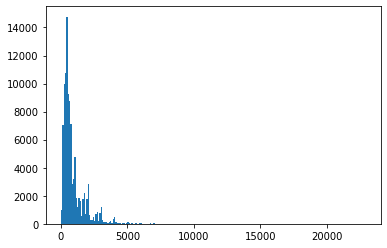

In [361]:
#作图
plt.hist(df["price"],bins)

In [362]:
#可以看出很多价格区间上没有商品  可以选择分桶的上限值为10000

In [363]:
#或者根据对手数据，考虑将对应价格区间的商品补充上架
price_count=pd.cut(df["price"],bins).value_counts()
zero_price_count=(price_count==0)
zero_price_count_list=zero_price_count[zero_price_count.values].index
zero_price_count_list

CategoricalIndex([(10800, 10900], (10700, 10800], (10600, 10700],
                  (10500, 10600], (10400, 10500], (10300, 10400],
                  (10200, 10300],   (7300, 7400],   (7400, 7500],
                    (9700, 9800],
                  ...
                  (15400, 15500], (15300, 15400], (15200, 15300],
                  (15100, 15200], (15000, 15100], (14900, 15000],
                  (14800, 14900], (14700, 14800], (14600, 14700],
                  (11400, 11500]],
                 categories=[(0, 100], (100, 200], (200, 300], (300, 400], (400, 500], (500, 600], (600, 700], (700, 800], ...], ordered=True, dtype='category', length=134)

In [364]:
#根据1000分桶
bins=np.arange(0,23000,1000)
price_cut=pd.cut(df["price"],bins).value_counts()
price_cut

(0, 1000]         74772
(1000, 2000]      18309
(2000, 3000]       7125
(3000, 4000]       2590
(4000, 5000]        913
(5000, 6000]        341
(6000, 7000]        174
(7000, 8000]         58
(8000, 9000]         30
(9000, 10000]        24
(10000, 11000]       13
(11000, 12000]        4
(13000, 14000]        4
(12000, 13000]        1
(18000, 19000]        1
(20000, 21000]        0
(14000, 15000]        0
(15000, 16000]        0
(16000, 17000]        0
(17000, 18000]        0
(19000, 20000]        0
(21000, 22000]        0
Name: price, dtype: int64

(array([7.4748e+04, 1.8313e+04, 7.1350e+03, 2.5950e+03, 9.1800e+02,
        3.4100e+02, 1.7400e+02, 5.8000e+01, 3.0000e+01, 2.4000e+01,
        1.3000e+01, 4.0000e+00, 1.0000e+00, 4.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00]),
 array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
         9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000,
        18000, 19000, 20000, 21000, 22000]),
 <a list of 22 Patch objects>)

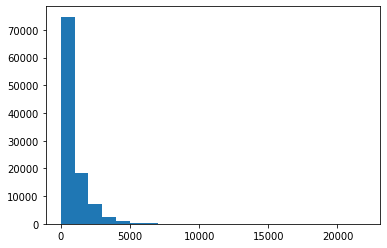

In [365]:
#作图
plt.hist(df["price"],bins)

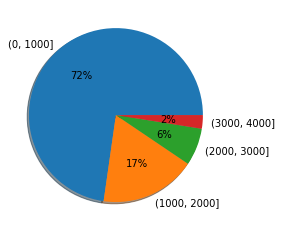

In [366]:
#考虑制作5000元下的饼图
bins=np.arange(0,5000,1000)
main_price_cut=pd.cut(df["price"],bins).value_counts()
pie=plt.pie(x=main_price_cut.values,labels=main_price_cut.index,autopct="%d%%",shadow=True)

In [367]:

'''
从channelId维度进行分析 查看那个渠道的销售额和销售量多  
可以重点投放 另外要考虑渠道的成本和利润综合比较 
或者同时看渠道和商品维度分析 查看不同渠道同一个商品的是否买的好

'''


'\n从channelId维度进行分析 查看那个渠道的销售额和销售量多  \n可以重点投放 另外要考虑渠道的成本和利润综合比较 \n或者同时看渠道和商品维度分析 查看不同渠道同一个商品的是否买的好\n\n'

In [368]:
#渠道销量
channelId_count=df.groupby("channelId").count()["orderId"].sort_values(ascending=False)
channelId_count

channelId
9058255c90    38834
29d55d09c6     7413
41a4e91d29     6739
df9f79c426     5930
46d5cea30d     4944
e0e6019897     3686
e7dc8ef259     3530
ad7e4ca9ae     2889
4c33002d9a     2818
e22babe5d4     2415
6ff1752b69     2371
1de79c8723     1690
af0dd9c421     1353
1fa8c3a566      775
a33b212a84      732
cb5b1afd00      611
c5cb48429c      573
ad3834e8a1      568
cbccc0808e      564
a9993060bb      494
546422b073      486
8da8c19c30      464
9eb42a6716      440
d79e2a67f0      429
4d80ac6414      410
9e4805945c      381
e4cff82b9a      367
7e431d69e6      334
cda4fe6bbf      306
eef1c8cc26      274
              ...  
cb6775c186        1
4c4032a578        1
5825a2d546        1
ba84f7e69c        1
68d4b21608        1
67fd535eec        1
672360df82        1
66885fe04d        1
630e6aac7c        1
60850f2fa1        1
bf362a7131        1
c152593f06        1
5ace79f140        1
5ac594e233        1
c170be5f98        1
c374a493bb        1
4cbd24e10d        1
552c130829        1
54f9be2a22

In [369]:
#渠道销售额
channelId_turnover=df.groupby("channelId").sum()["payMoney"].sort_values(ascending=False)
channelId_turnover

channelId
9058255c90    34461699.9
29d55d09c6     6245888.9
41a4e91d29     5874274.4
df9f79c426     5129050.3
46d5cea30d     4259746.1
e0e6019897     3065217.5
e7dc8ef259     2974298.2
ad7e4ca9ae     2533813.2
4c33002d9a     2286017.6
6ff1752b69     2007650.0
e22babe5d4     1993579.1
1de79c8723     1584864.1
af0dd9c421     1167941.0
1fa8c3a566      661364.3
a33b212a84      594756.7
cb5b1afd00      516964.1
ad3834e8a1      498382.2
a9993060bb      476111.5
cbccc0808e      459503.3
c5cb48429c      446923.0
9eb42a6716      399568.9
546422b073      382817.8
8da8c19c30      377429.6
d79e2a67f0      362094.3
4d80ac6414      349064.9
9e4805945c      337038.1
e4cff82b9a      335123.3
7e431d69e6      327395.9
cda4fe6bbf      259769.0
809ca35aee      235816.6
                 ...    
69e39f2e0c         229.0
7807ed618f         222.0
7bf0a96740         219.0
9c95618b21         218.0
ba1bf5acb2         210.0
3c8d2d4c5f         210.0
d954a4399f         210.0
66885fe04d         205.0
7f6760fc50     

In [370]:
#从销售额和销量角度看 优质的渠道
great_channels=channelId_turnover.head(10).index.intersection(channelId_count.head(10).index)
great_channels

Index(['9058255c90', '29d55d09c6', '41a4e91d29', 'df9f79c426', '46d5cea30d',
       'e0e6019897', 'e7dc8ef259', 'ad7e4ca9ae', '4c33002d9a'],
      dtype='object', name='channelId')

In [371]:
#各个渠道商品的销量
channelId_productId_count=df.groupby(by=["channelId","productId"]).count()["orderId"].sort_values(ascending=False)
channelId_productId_count

channelId   productId
9058255c90  762          132
            385          125
            895          123
            103          120
            613          115
            345          113
            823          112
            845          111
            321          110
            38           110
            587          109
            403          107
            96           106
            480          105
            61           105
            60           104
            977          104
            765          100
            829           97
            938           97
            659           96
            889           92
            69            92
            541           91
            503           90
            907           90
            785           90
            959           90
            720           87
            515           86
                        ... 
a7b5e022c8  250            1
            261            1
            274      

In [372]:
#各个渠道商品的销售额
channelId_productId_turnover=df.groupby(by=["channelId","productId"]).sum()["payMoney"].sort_values(ascending=False)
channelId_productId_turnover

channelId   productId
9058255c90  385          188085.1
            405          163446.0
            345          150250.2
            61           139829.0
            720          130654.0
            103          121760.0
            715          113850.0
            340          111507.0
            698          107335.0
            212          103977.0
            383          103970.0
            182          103601.0
            938          102380.0
            396          100974.0
            733           94664.0
            823           93058.0
            503           92767.1
            845           92017.0
            525           91834.0
            907           90886.8
            384           90448.0
            822           88158.0
            594           87136.0
            829           86050.8
            48            85421.0
            732           84976.0
            423           84283.0
            124           82640.0
            736           

In [373]:
#下单时间分析
#按小时分析，可以在对应的时段做推广 中午12.00-14,00午休时间 和晚上20.00左右 是互联网产品的高峰期
df["orderHour"]=df["createTime"].dt.hour

In [374]:
orderHour_count=df.groupby("orderHour").count()["orderId"]
orderHour_count.sort_values(ascending=False)

orderHour
13    13231
14    10603
12     9683
20     9484
19     8368
21     7541
15     6596
11     5460
22     5412
18     5333
16     4567
17     4273
10     3589
23     3548
9      2112
0      1720
8      1046
1       660
7       459
2       257
6       176
3       125
5        67
4        51
Name: orderId, dtype: int64

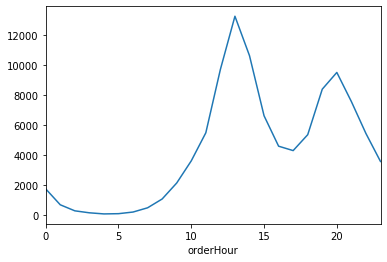

In [375]:
#作图
orderHour_count.plot()

In [376]:
#从星期来看
df["orderWeek"]=df["createTime"].dt.dayofweek+1

In [377]:
orderWeek_count=df.groupby("orderWeek").count()["orderId"]
orderWeek_count.sort_values(ascending=False)

orderWeek
6    19501
7    16932
5    16200
4    13797
3    12937
1    12506
2    12488
Name: orderId, dtype: int64

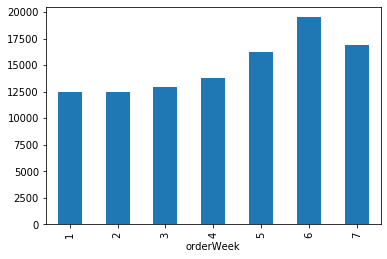

In [378]:
#作图 五六日的订单最多
orderWeek_count.plot(kind="bar")

In [379]:
#下单后多久支付
df["paydiff"]=(df["payTime"]-df["createTime"])
df["paydiff"]

id
1           0 days 00:00:22
2           0 days 00:00:39
3           0 days 00:01:05
4           0 days 00:00:18
5           0 days 00:00:43
6           0 days 00:01:11
7           0 days 00:00:13
8           0 days 00:05:04
9           0 days 00:02:17
10          0 days 00:02:09
11          0 days 00:00:12
12          0 days 00:01:33
13          0 days 00:01:58
14          0 days 00:00:21
15          0 days 00:01:37
16          0 days 00:03:14
17          0 days 00:00:15
18          0 days 00:00:11
19          0 days 00:00:59
20          0 days 00:00:10
21          0 days 00:00:19
22          0 days 00:00:23
23          0 days 00:03:45
24          0 days 00:01:07
25          0 days 00:00:49
26          0 days 00:00:17
27          0 days 00:00:18
28          0 days 00:01:14
29          0 days 00:02:05
30          0 days 00:00:18
                ...        
104528      0 days 00:00:27
104529      0 days 00:00:31
104530      0 days 00:00:35
104531      0 days 00:00:30
104532      0 day

In [380]:
#下单后多久支付
def get_seconds(x):
    return x.total_seconds()

#w为了避免上述的时间格式
df["paydiff"]=(df["payTime"]-df["createTime"]).apply(get_seconds)
df["paydiff"]

id
1              22.0
2              39.0
3              65.0
4              18.0
5              43.0
6              71.0
7              13.0
8             304.0
9             137.0
10            129.0
11             12.0
12             93.0
13            118.0
14             21.0
15             97.0
16            194.0
17             15.0
18             11.0
19             59.0
20             10.0
21             19.0
22             23.0
23            225.0
24             67.0
25             49.0
26             17.0
27             18.0
28             74.0
29            125.0
30             18.0
            ...    
104528         27.0
104529         31.0
104530         35.0
104531         30.0
104532         29.0
104533         24.0
104534        111.0
104535         36.0
104536         29.0
104537         30.0
104538         56.0
104539        454.0
104540         25.0
104541         25.0
104542         24.0
104543         58.0
104544         93.0
104545         22.0
104546        430

In [381]:
#可以看到有些用户的支付时间是负的 猜测为预付款的购买

In [382]:
#转化单位为分钟
df["paydiff"]=df["paydiff"]/60
df["paydiff"]


id
1             0.366667
2             0.650000
3             1.083333
4             0.300000
5             0.716667
6             1.183333
7             0.216667
8             5.066667
9             2.283333
10            2.150000
11            0.200000
12            1.550000
13            1.966667
14            0.350000
15            1.616667
16            3.233333
17            0.250000
18            0.183333
19            0.983333
20            0.166667
21            0.316667
22            0.383333
23            3.750000
24            1.116667
25            0.816667
26            0.283333
27            0.300000
28            1.233333
29            2.083333
30            0.300000
              ...     
104528        0.450000
104529        0.516667
104530        0.583333
104531        0.500000
104532        0.483333
104533        0.400000
104534        1.850000
104535        0.600000
104536        0.483333
104537        0.500000
104538        0.933333
104539        7.566667
104540  

In [383]:
#分桶 一分钟  10分钟 半小时 一小时 12小时 一天
bins=[0,1,10,30,60,720,1440]
paydiff_count=pd.cut(df["paydiff"],bins).value_counts()
paydiff_count

(0, 1]         82515
(1, 10]        19612
(10, 30]        1169
(60, 720]        321
(30, 60]         318
(720, 1440]       84
Name: paydiff, dtype: int64

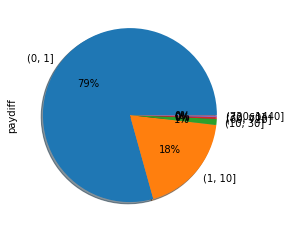

In [384]:
#作图 可以看出99%的用户在一分钟内下单
paydiff_count.plot(kind="pie",autopct="%d%%",shadow=True)

In [385]:
#看月成交额
df["month"]=df["createTime"].dt.month
month_turnover=df.groupby("month").sum()["payMoney"]
month_turnover.sort_values(ascending=False)

month
7     9400024.4
8     8836196.8
6     8796370.4
1     8435605.7
2     8300360.3
5     8266626.9
3     7932704.4
4     7791260.2
9     6195991.8
10    6112864.6
12    5769055.2
11    4859316.0
Name: payMoney, dtype: float64

In [386]:
df.set_index("createTime",inplace=True)

In [387]:
df.head()

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,payTime,orderHour,orderWeek,paydiff,month
createTime,,,,,,,,,,,,,
2016-01-01 12:53:02,232148841,2794924,268,110001,353.0,353.0,9058255c90,3,2016-01-01 12:53:24,12,5,0.366667,1
2016-01-01 21:42:51,222298971,1664684,801,330001,512.0,499.0,e0e6019897,2,2016-01-01 21:43:30,21,5,0.650000,1
2016-01-01 14:10:13,211494392,2669372,934,220002,621.0,621.0,9058255c90,3,2016-01-01 14:11:18,14,5,1.083333,1
2016-01-01 17:43:35,334575272,1924727,422,230001,506.0,420.0,46d5cea30d,2,2016-01-01 17:43:53,17,5,0.300000,1
2016-01-01 18:52:04,144825651,4148671,473,130006,1491.0,1420.0,6ff1752b69,2,2016-01-01 18:52:47,18,5,0.716667,1


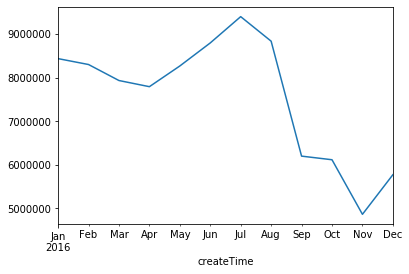

In [391]:
#将时间作为索引   
#Pandas中的resample，重新采样，是对原样本重新处理的一个方法，
#是一个对常规时间序列数据重新采样和频率转换的便捷的方法。
turnover=df.resample("M").sum()["payMoney"]
turnover.plot()